In [1]:
import webdataset as wds

In [2]:
# url = "/scratch/gpfs/KNORMAN/webdataset_nsd/webdataset_split/val/val_subj01_0.tar"
url = "/home/jimgoo/data/neuro/naturalscenesdataset/webdataset/val/val_subj01_0.tar"
num_workers = 1
batch_size = 300
image_var = "images"

val_data = wds.DataPipeline([wds.SimpleShardList(url),
                    wds.tarfile_to_samples(),
                    # testing this
                    wds.shuffle(2,initial=2),
                    wds.decode("torch"),
                    wds.rename(images="jpg;png", voxels="nsdgeneral.npy", 
                                embs="sgxl_emb.npy", trial="trial.npy"),
                    wds.to_tuple("voxels", image_var, "__key__"),
                    wds.batched(batch_size, partial=True),
                ]) #.with_epoch(num_worker_batches)

val_dl = wds.WebLoader(val_data, num_workers=num_workers,
                       batch_size=None, shuffle=False, persistent_workers=True)

In [3]:
import time

In [4]:
t0 = time.time()
n_batches = 0
n_samples = 0
keys = set()
for i, (voxel, im, key) in enumerate(val_dl):
    print(i, voxel.shape, len(key))
    n_batches += 1
    n_samples += voxel.shape[0]
    keys.update(key)
t1 = time.time()

# 2, 492, 492, 3.780
n_batches, n_samples, len(keys), t1-t0

0 torch.Size([300, 15724]) 300
1 torch.Size([192, 15724]) 192


(2, 492, 492, 3.677466869354248)

In [5]:
list(keys)[:10]

['sample01626',
 'sample08402',
 'sample18638',
 'sample09935',
 'sample05211',
 'sample04223',
 'sample07385',
 'sample14656',
 'sample22927',
 'sample26205']

In [6]:
voxel.isinf().any()

tensor(False)

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.1)

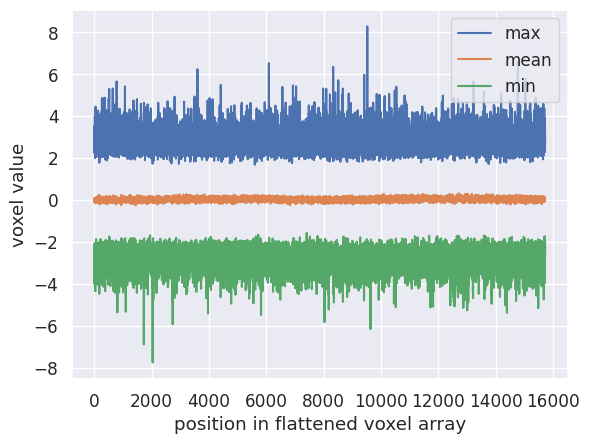

In [14]:
# <TODO> scale the voxels once I understand more about the format of trials inside the tar dataset files
V = voxel.cpu().numpy()
plt.plot(np.vstack((np.max(V, 0), np.mean(V, 0), np.min(V, 0))).T);
plt.legend(['max', 'mean', 'min']);
plt.xlabel('position in flattened voxel array');
plt.ylabel('voxel value');